In [2]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare

In [ ]:
def plot_heatmap(data, row_labels, col_labels, title="Heatmap", cmap="coolwarm"):
    """
    Plots a heatmap using seaborn.

    Parameters:
    - data: 2D NumPy array or list of lists (heatmap values)
    - row_labels: List of row labels
    - col_labels: List of column labels
    - title: Title of the heatmap (default: "Heatmap")
    - cmap: Colormap (default: "coolwarm")

    Returns:
    - Displays a heatmap
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        data,
        annot=True,
        fmt=".1f",
        cmap=cmap,
        xticklabels=col_labels,
        yticklabels=row_labels,
    )
    plt.title(title)
    plt.xlabel("Opponent Strategy")
    plt.ylabel("Player Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()


def plot_heatmap_with_variance(
    mean_data,
    variance_data,
    row_labels,
    col_labels,
    title="Heatmap with Variance",
    cmap="coolwarm",
):
    """
    Plots a heatmap using seaborn, displaying both mean values and variance annotations.

    Parameters:
    - mean_data: 2D NumPy array or list of lists containing the mean values.
    - variance_data: 2D NumPy array or list of lists containing the variance values.
    - row_labels: List of row labels (strategy names for rows).
    - col_labels: List of column labels (strategy names for columns).
    - title: Title of the heatmap (default: "Heatmap with Variance").
    - cmap: Colormap (default: "coolwarm").

    Returns:
    - Displays a heatmap with variance annotations.
    """
    plt.figure(figsize=(12, 10))

    # Create annotation text with mean ± variance
    annotations = np.array(
        [
            [f"{mean:.1f}\n ± {var:.1f}" for mean, var in zip(mean_row, var_row)]
            for mean_row, var_row in zip(mean_data, variance_data)
        ]
    )

    # Plot heatmap
    ax = sns.heatmap(
        mean_data,
        annot=annotations,
        fmt="",
        cmap=cmap,
        xticklabels=col_labels,
        yticklabels=row_labels,
    )

    plt.title(title)
    plt.xlabel("Opponent Strategy")
    plt.ylabel("Player Strategy")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()

In [ ]:
def play_ipd(strategy_A, strategy_B, rounds=10):
    """
    Plays an Iterated Prisoner's Dilemma game.

    Parameters:
    - strategy_A: Function that takes (own_history, opponent_history) and returns 'C' or 'D'.
    - strategy_B: Function that takes (own_history, opponent_history) and returns 'C' or 'D'.
    - rounds: Number of rounds to play.

    Returns:
    - history_A: List of Agent A's actions.
    - history_B: List of Agent B's actions.
    - scores_A: Total score of Agent A.
    - scores_B: Total score of Agent B.
    """

    # Reward matrix
    rewards = {
        ("C", "C"): (3, 3),
        ("C", "D"): (0, 5),
        ("D", "C"): (5, 0),
        ("D", "D"): (1, 1),
    }

    # Initialize history
    history_A = []
    history_B = []
    scores_A = 0
    scores_B = 0

    for _ in range(rounds):
        # Get actions from both strategies
        action_A = strategy_A(history_A, history_B)
        action_B = strategy_B(history_B, history_A)

        # Ensure actions are valid
        if action_A not in ["C", "D"] or action_B not in ["C", "D"]:
            raise ValueError("Strategies must return 'C' or 'D'")

        # Store actions
        history_A.append(action_A)
        history_B.append(action_B)

        # Assign scores
        score_A, score_B = rewards[(action_A, action_B)]
        scores_A += score_A
        scores_B += score_B

    return history_A, history_B, scores_A, scores_B

In [ ]:
def history_to_vector(history):
    vector = []
    for action in history:
        if action == "D":
            vector.append(1e-10)
        elif action == "C":
            vector.append(1)
    return np.array(vector)

In [40]:
def tit_for_tat(my_history, opponent_history):
    """Cooperate on the first move, then mimic the opponent's last move."""
    return "C" if not opponent_history else opponent_history[-1]


def always_defect(my_history, opponent_history):
    """Always defect."""
    return "D"


def always_cooperate(my_history, opponent_history):
    """Always cooperate."""
    return "C"


def random_strategy(my_history, opponent_history):
    """Randomly cooperates or defects."""
    random.seed()
    return random.choice(["C", "D"])


def grudger(my_history, opponent_history):
    """Cooperates unless opponent defects once, then always defects."""
    return "D" if "D" in opponent_history else "C"


def pavlov(my_history, opponent_history):
    """Cooperates if last round was mutual cooperation or mutual defection, otherwise switches."""
    if not my_history:  # First move
        return "C"
    if my_history[-1] == opponent_history[-1]:  # If both did the same last round
        return my_history[-1]  # Repeat the move
    return "D" if my_history[-1] == "C" else "C"  # Switch otherwise


def adaptive_majority(my_history, opponent_history):
    """Counts past moves and plays majority-based strategy."""
    if not opponent_history:
        return "C"
    return "C" if opponent_history.count("C") > opponent_history.count("D") else "D"


def tit_for_two_tats(my_history, opponent_history):
    """Cooperates unless opponent defects twice in a row."""
    if len(opponent_history) >= 2 and opponent_history[-2:] == ["D", "D"]:
        return "D"
    return "C"


def deterministic_random(my_history, opponent_history):
    random.seed(a=len(my_history))
    return random.choice(["C", "D"])


def downing(my_history, opponent_history):
    """Implements the First by Downing strategy."""
    if not my_history:
        return "D"
    if len(my_history) == 1:
        return "D" if opponent_history[-1] == "C" else "C"

    num_coop_after_C = sum(
        1
        for i in range(len(my_history) - 1)
        if my_history[i] == "C" and opponent_history[i + 1] == "C"
    )
    num_coop_after_D = sum(
        1
        for i in range(len(my_history) - 1)
        if my_history[i] == "D" and opponent_history[i + 1] == "C"
    )

    alpha = num_coop_after_C / (opponent_history.count("C") + 1)
    beta = num_coop_after_D / max(opponent_history.count("D"), 2)

    R, P, S, T = 3, 1, 0, 5  # payoff matrix
    expected_C = alpha * R + (1 - alpha) * S
    expected_D = beta * T + (1 - beta) * P

    if expected_C > expected_D:
        return "C"
    if expected_C < expected_D:
        return "D"
    return "C" if my_history[-1] == "D" else "D"


def feld(
    my_history,
    opponent_history,
):
    """Implements the Feld strategy."""
    START_COOP_PROB = 1.0
    END_COOP_PROB = 0.5
    ROUNDS_OF_DECAY = 200

    if not opponent_history:
        return "C"
    if opponent_history[-1] == "D":
        return "D"

    diff = END_COOP_PROB - START_COOP_PROB
    slope = diff / ROUNDS_OF_DECAY
    p = max(START_COOP_PROB + slope * len(my_history), END_COOP_PROB)
    return "C" if random.random() < p else "D"


def graaskamp(my_history, opponent_history, alpha=0.05):
    """Implements the Graaskamp strategy."""
    if not my_history:
        return "C"

    if len(my_history) < 56:
        return "D" if opponent_history[-1] == "D" or len(my_history) == 50 else "C"

    next_random_defection_turn = None

    # Check if opponent plays randomly, if so, defect for the rest of the game
    p_value = chisquare(
        [opponent_history.count("C"), opponent_history.count("D")]
    ).pvalue
    opponent_is_random = p_value >= alpha
    if opponent_is_random:
        return "D"
    # Check if opponent plays Tit for Tat or a clone of itself.
    if (
        all(opponent_history[i] == my_history[i - 1] for i in range(1, len(my_history)))
        or opponent_history == my_history
    ):
        return "D" if opponent_history[-1] == "D" else "C"

    # resample the next defection turn
    if next_random_defection_turn is None:
        next_random_defection_turn = random.randint(5, 15) + len(my_history)

    if next_random_defection_turn == len(my_history):
        next_random_defection_turn = random.randint(5, 15) + len(my_history)
        return "D"
    return "C"


def grofman(my_history, opponent_history):
    """Cooperates if it's the first move or if both players played the same move last round.
    Otherwise, defects with a probability of 2/7."""
    if not my_history or my_history[-1] == opponent_history[-1]:
        return "C"
    return random.choices(["C", "D"], weights=[2, 5])[0]


def joss(my_history, opponent_history, p=0.9):
    """Cooperates with probability p if the opponent cooperated last round; otherwise defects."""
    if not opponent_history:
        return "C"
    if opponent_history[-1] == "C":
        return random.choices(["C", "D"], weights=[p, 1 - p])[0]
    return "D"


def nydegger(my_history, opponent_history):
    """Uses a lookup table based on the last three rounds of play to determine its move."""
    if not my_history:
        return "C"
    if len(my_history) == 1:
        return (
            "D" if opponent_history[-1] == "D" else "C"
        )  # Tit-for-Tat for first round
    if len(my_history) == 2:
        return (
            "D"
            if opponent_history[:2] == ["D", "C"]
            else ("D" if opponent_history[-1] == "D" else "C")
        )

    # Score the last three rounds to determine an index
    score_map = {("C", "C"): 0, ("C", "D"): 2, ("D", "C"): 1, ("D", "D"): 3}
    weights = [16, 4, 1]  # 16*a1 + 4*a2 + a3
    A = sum(
        weight * score_map[(my, op)]
        for weight, my, op in zip(weights, my_history[-3:], opponent_history[-3:])
    )

    # Predefined indices for defection
    A_defect = {1, 6, 7, 17, 22, 23, 26, 29, 30, 31, 33, 38, 39, 45, 49, 54, 55, 58, 61}
    return "D" if A in A_defect else "C"


def tullock(history, opponent_history) -> str:
    random_choice = lambda p: "C" if random.random() < p else "D"
    rounds_to_cooperate = 11
    if len(history) < rounds_to_cooperate:
        return "C"
    rounds = rounds_to_cooperate - 1
    cooperate_count = opponent_history[-rounds:].count("C")
    prop_cooperate = cooperate_count / rounds
    prob_cooperate = max(0, prop_cooperate - 0.10)
    return random_choice(prob_cooperate)


# Stein and Rapoport Strategy
def stein_rapoport(
    history,
    opponent_history,
) -> str:
    ALPHA = 0.05
    round_number = len(history) + 1
    opponent_is_random = False

    if round_number < 5:
        return "C"
    elif round_number < 15:
        return opponent_history[-1]

    if round_number % 15 == 0:
        cooperations = opponent_history.count("C")
        defections = opponent_history.count("D")
        p_value = chisquare([cooperations, defections]).pvalue
        opponent_is_random = p_value >= ALPHA

    if opponent_is_random:
        return "D"
    return opponent_history[-1]

In [ ]:
def shadow_tit_for_tat(my_history, opponent_history):
    """A deceptive but adaptive strategy that initially plays Tit-for-Tat,
    then selectively punishes frequent defectors while occasionally exploiting cooperators.
    """

    # First move is always cooperation
    if not opponent_history:
        return "C"

    rounds_played = len(opponent_history)

    # Play Tit-for-Tat for the first 5 rounds
    if rounds_played < 5:
        return opponent_history[-1] if opponent_history else "C"

    # Count how many times opponent has defected
    num_defections = opponent_history.count("D")
    defection_rate = num_defections / rounds_played

    # If opponent defects more than 40% of the time, switch to full defection mode
    if defection_rate > 0.4:
        return "D"

    # Occasionally defect (every 7-10 rounds randomly) against naive cooperators
    if rounds_played % random.randint(7, 10) == 0:
        return "D"

    # If opponent punishes us for defecting, return to Tit-for-Tat mode
    if len(my_history) > 1 and my_history[-1] == "D" and opponent_history[-1] == "D":
        return "C"

    # If opponent has cooperated 5 times in a row, reset punishment mechanism
    if len(opponent_history) >= 5 and opponent_history[-5:] == ["C"] * 5:
        return "C"

    # Default to Tit-for-Tat behavior
    return opponent_history[-1]


def forgiving_opportunist(my_history, opponent_history):
    """A strategy that cooperates, forgives one defect, but punishes repeated defections.
    Occasionally defects to avoid exploitation."""

    # First move is always cooperation
    if not opponent_history:
        return "C"

    # 10% chance to defect randomly to avoid exploitation
    if random.random() < 0.1:
        return "D"

    # If opponent defected twice in the last 3 rounds, retaliate
    if opponent_history[-3:].count("D") >= 2:
        return "D"

    # If opponent cooperated 3 times in a row, reset & forgive
    if opponent_history[-3:] == ["C", "C", "C"]:
        return "C"

    # If opponent defected once, forgive them
    if opponent_history[-1] == "D":
        return "C"

    # Otherwise, cooperate
    return "C"


def pattern_aware_opportunist(my_history, opponent_history):
    """An opportunistic strategy that detects opponent patterns, adapts to defectors,
    and occasionally exploits naive strategies."""

    # First two moves are always cooperation
    if len(opponent_history) < 2:
        return "C"

    # Count defections in the last 4 rounds
    recent_defections = opponent_history[-4:].count("D")

    # If opponent defects twice within 4 rounds, retaliate
    if recent_defections >= 2:
        return "D"

    # Detect "C-D-C-D" alternating pattern and defect to break it
    if len(opponent_history) >= 4 and opponent_history[-4:] == ["C", "D", "C", "D"]:
        return "D"

    # If opponent plays "D-D-D", respond with three rounds of defection
    if len(opponent_history) >= 3 and opponent_history[-3:] == ["D", "D", "D"]:
        return "D"

    # If opponent has cooperated 5 times in a row, reset and forgive
    if len(opponent_history) >= 5 and opponent_history[-5:] == ["C"] * 5:
        return "C"

    # Occasionally defect every 6-10 rounds to maximize points
    if len(my_history) % random.randint(6, 10) == 0:
        return "D"

    # Default to cooperation
    return "C"


def deceptive_caretaker(my_history, opponent_history):
    """A deceptive but adaptive strategy that extracts points from naive cooperators,
    punishes aggressive defectors, and strategically forgives after testing trust."""

    # First move is always cooperation
    if not opponent_history:
        return "C"

    rounds_played = len(opponent_history)
    coop_count = opponent_history.count("C")
    coop_rate = (
        coop_count / rounds_played if rounds_played > 0 else 1.0
    )  # Prevent division by zero

    # If opponent cooperates more than 70% of the time, occasionally defect to maximize points
    if coop_rate > 0.7 and rounds_played % random.randint(6, 9) == 0:
        return "D"

    # If opponent defects more than 50% of the time, retaliate by always defecting
    if coop_rate < 0.5:
        return "D"

    # If opponent defects twice in a row, punish with 3 defections
    if len(opponent_history) >= 2 and opponent_history[-2:] == ["D", "D"]:
        return "D"

    # If opponent shows sudden cooperation after defecting a lot, test trust before forgiving
    if len(opponent_history) >= 3 and opponent_history[-3:] == ["C", "C", "C"]:
        return "C"

    # Fake "peace offering": Cooperate once after defecting to see if opponent gets baited into cooperating
    if len(my_history) >= 2 and my_history[-1] == "D" and opponent_history[-1] == "C":
        return "C"

    # 5% chance to defect randomly to prevent exploitation
    if random.random() < 0.05:
        return "D"

    # Default to cooperation
    return "C"

In [41]:
baseline_policies = [
    deterministic_random,
    tit_for_tat,
    always_defect,
    always_cooperate,
    random_strategy,
    grudger,
    pavlov,
    adaptive_majority,
    tit_for_two_tats,
    feld,
    graaskamp,
    downing,
    grofman,
    joss,
    nydegger,
    tullock,
    stein_rapoport,
]
generated_policies = [
    shadow_tit_for_tat,
    forgiving_opportunist,
    pattern_aware_opportunist,
    deceptive_caretaker,
]
all_policies = baseline_policies + generated_policies

In [42]:
labels = [
    "deterministic_random",
    "tit_for_tat",
    "always_defect",
    "always_cooperate",
    "random_strategy",
    "grudger",
    "pavlov",
    "adaptive_majority",
    "tit_for_two_tats",
    "feld",
    "graaskamp",
    "downing",
    "grofman",
    "joss",
    "nydegger",
    "tullock",
    "stein_rapoport",
    "shadow_tit_for_tat",
    "forgiving_opportunist",
    "pattern_aware_opportunist",
    "deceptive_caretaker",
]

In [43]:
%%time
cos_sim = 0
rounds = 200
N = 100
score_matrix = np.zeros((N, len(all_policies), len(all_policies)))
cosine_matrix = np.zeros((N, len(all_policies), len(all_policies)))
for n in range(N):
    for i, policy_a in enumerate(all_policies):
        for j, policy_b in enumerate(all_policies):
            history_A, history_B, score_A, score_B = play_ipd(policy_a, policy_b, rounds=rounds)
            a = history_to_vector(history_A)
            b = history_to_vector(history_B)
            score_matrix[n, i, j] += score_A
            cosine_matrix[n, i, j] += np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

CPU times: user 4min 48s, sys: 13.4 s, total: 5min 1s
Wall time: 5min 2s


([<matplotlib.axis.XTick at 0x7f7f92610640>,
 [Text(0, 0, 'deterministic_random'),
  Text(1, 0, 'tit_for_tat'),
  Text(2, 0, 'always_defect'),
  Text(3, 0, 'always_cooperate'),
  Text(4, 0, 'random_strategy'),
  Text(5, 0, 'grudger'),
  Text(6, 0, 'pavlov'),
  Text(7, 0, 'adaptive_majority'),
  Text(8, 0, 'tit_for_two_tats'),
  Text(9, 0, 'feld'),
  Text(10, 0, 'graaskamp'),
  Text(11, 0, 'downing'),
  Text(12, 0, 'grofman'),
  Text(13, 0, 'joss'),
  Text(14, 0, 'nydegger'),
  Text(15, 0, 'tullock'),
  Text(16, 0, 'stein_rapoport'),
  Text(17, 0, 'shadow_tit_for_tat'),
  Text(18, 0, 'forgiving_opportunist'),
  Text(19, 0, 'pattern_aware_opportunist'),
  Text(20, 0, 'deceptive_caretaker')])

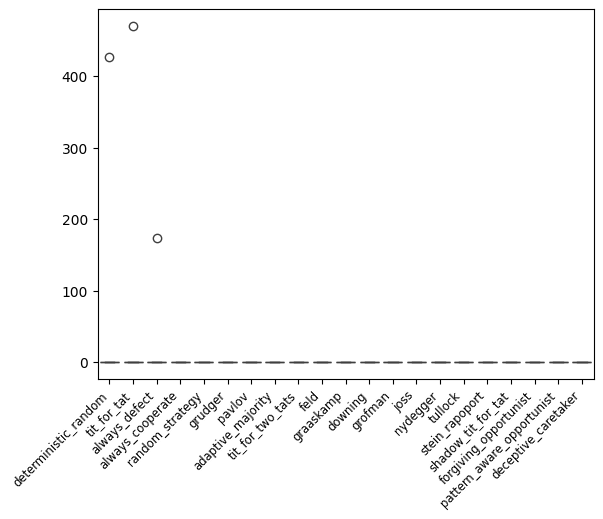

In [39]:
sns.boxplot(score_matrix.mean(axis=2))
plt.xticks(range(len(labels)), labels, size="small", rotation=45, ha="right")

'always_cooperate'

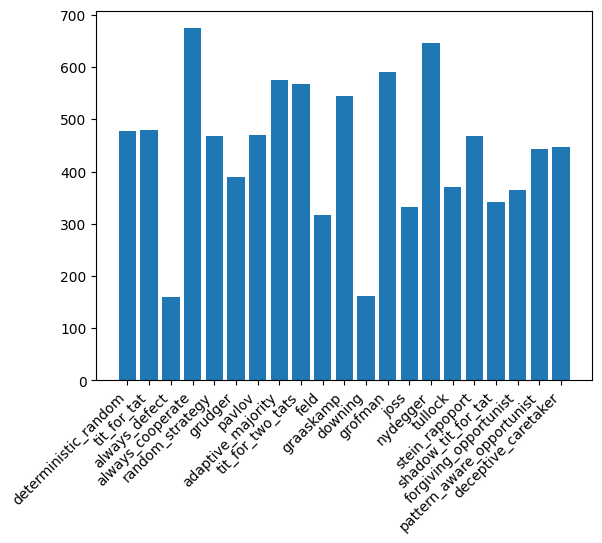

In [44]:
plt.bar(labels, score_matrix.mean(axis=(0, 1)))
plt.xticks(rotation=45, ha="right")
labels[score_matrix.mean(axis=(0, 1)).argmax()]

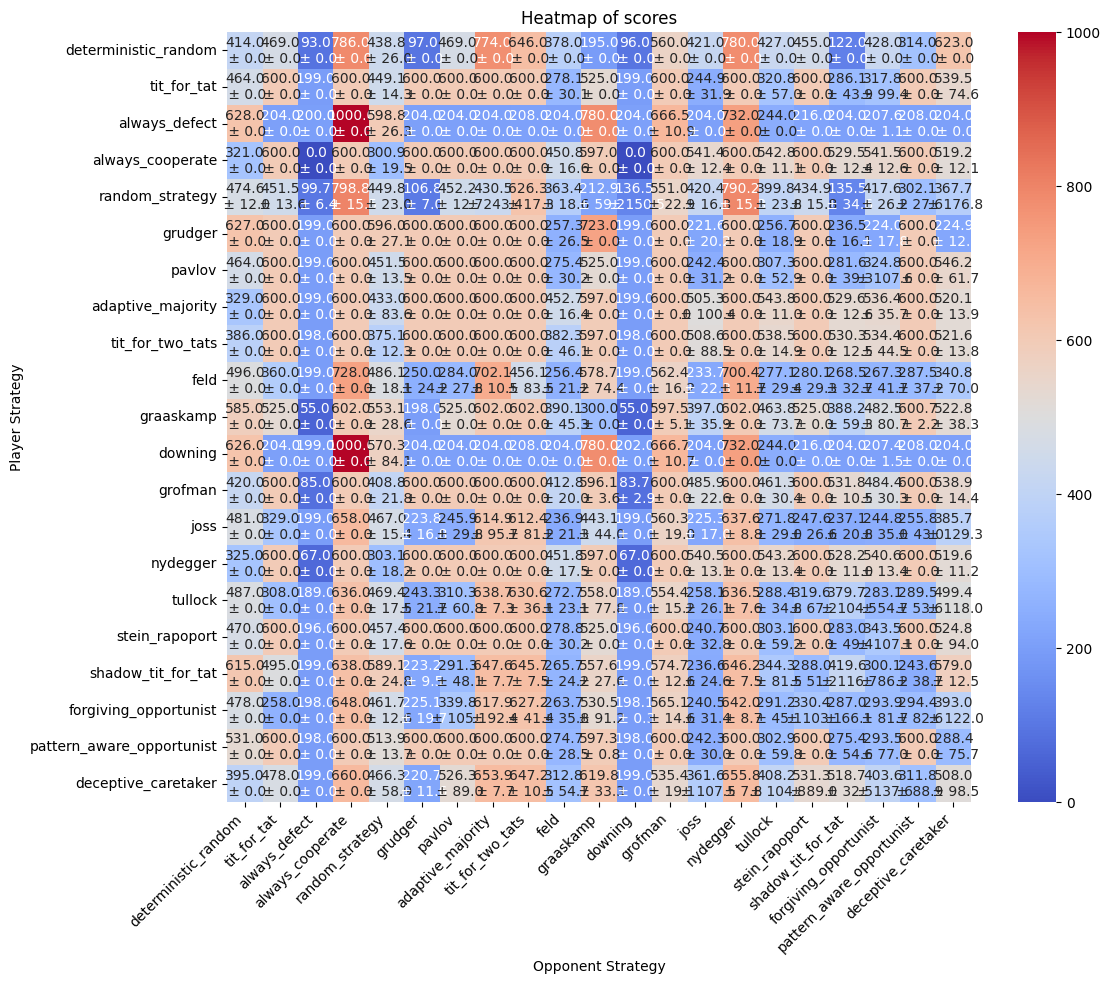

In [45]:
plot_heatmap_with_variance(
    score_matrix.mean(axis=0),
    score_matrix.std(axis=0),
    labels,
    labels,
    "Heatmap of scores",
)

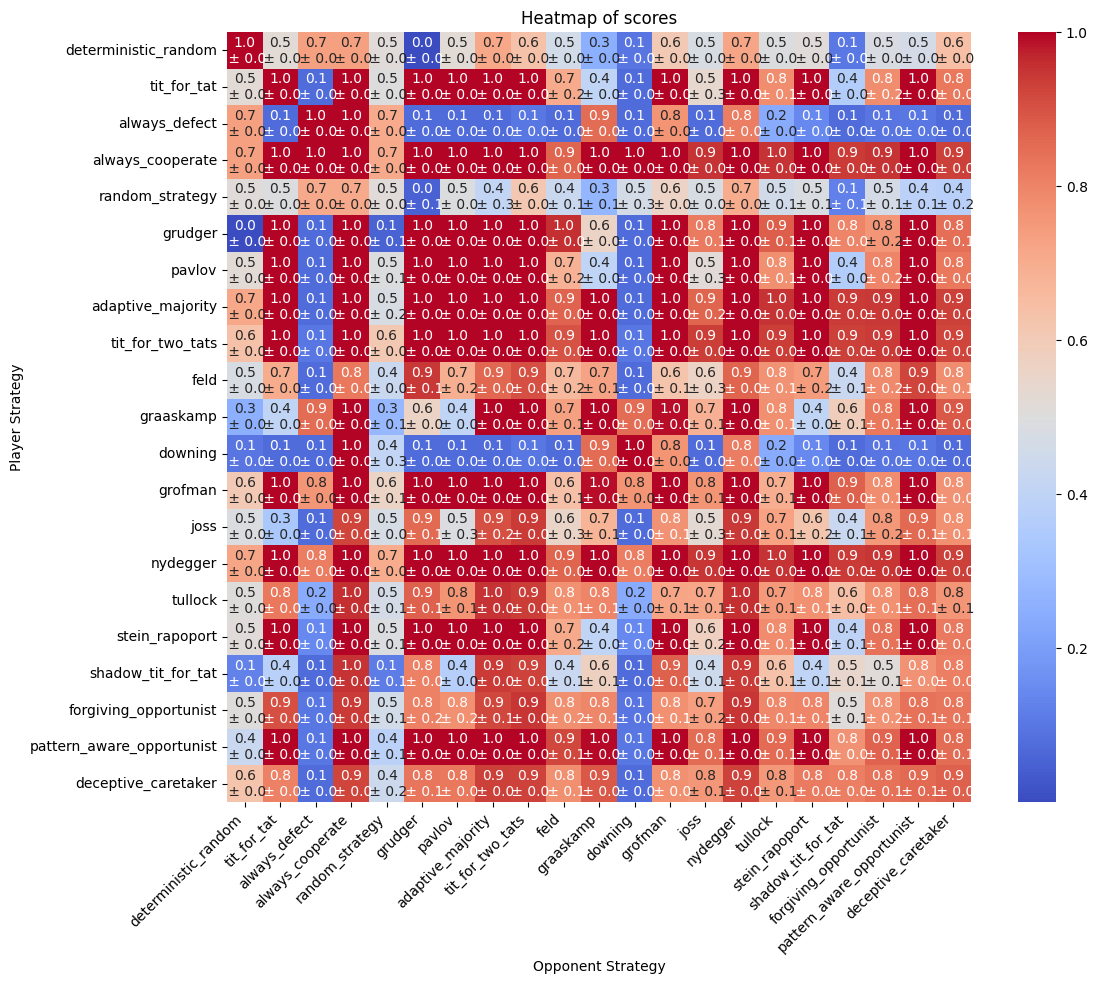

In [47]:
plot_heatmap_with_variance(
    cosine_matrix.mean(axis=0),
    cosine_matrix.std(axis=0),
    labels,
    labels,
    "Heatmap of scores",
)